I am using the Maryland Statewide Vehicle Crashes dataset. The dataset has crash data from July 2015 through June 2020. I got this dataset from the Maryland Open Data Portal website after selecting the public safety option. The link to the dataset is: https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu.

Hypotheses:

My first hypothesis that I am investigating is if there were less crashes in the second quarter of 2020 than the second quarter of other years because of Covid-19 and more people staying at home. 

The second hypothesis I am investigating is if more crashes happened during rush hour than other hours. I am then looking at the data from quarter 2 of 2020 to see if that would still be the case for that time period because a lot of people were working from home during that time.

In [1]:
import pandas
import datetime
import time
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df=pandas.read_csv('https://opendata.maryland.gov/api/views/65du-s3qu/rows.csv?accessType=DOWNLOAD', engine='python')
#loading dataset into dataframe

In [3]:
pandas.set_option('display.max_columns', None) 
#changing display settings to display all of the columns in the dataframe
#Reference: https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

In [4]:
df

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2016,Q4,Dark - Unknown Lighting,7.88,Baltimore,3.0,NaN,NaN,NaN,NaN,Unknown,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE5707001X,Property Damage Crash,Clear,6.01,20161121,22:00:00,NaN,No,N,N,BACOPD,UNK,NaN,0.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.371331,-76.812029,POINT (-76.8120288848877 39.3713313851305)
1,2016,Q3,Daylight,1.00,Baltimore,3.0,NaN,0.0,Non Intersection,1.0,Same Direction Sideswipe,7,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Not Divided",1.0,Not Applicable,0.0,AE5500001C,Property Damage Crash,NaN,6.01,20160707,17:54:00,NaN,No,N,N,BACOPD,UNK,NaN,1.0,Not Applicable,0.0,2000.0,CO,NaN,0.930,North,N,ROLLING RD,200.00,NaN,F,S,2677.0,CO,NaN,GEIPE RD,39.282364,-76.753814,POINT (-76.7538142204285 39.2823637715551)
2,2015,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,Intersection,2.0,Head On Left Turn,2,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Divided, Positive Median Barrier",4.0,Not Applicable,0.0,AE4880007G,NaN,NaN,6.01,20150508,14:08:00,NaN,No,N,N,BACOPD,UNK,NaN,1.0,Not Applicable,0.0,40.0,US,NaN,15.950,East,E,PULASKI HWY,0.00,NaN,F,E,5046.0,CO,NaN,SCHAFERS LA,39.324750,-76.499564,POINT (-76.499564 39.32475)
3,2018,Q4,Daylight,1.00,Baltimore,3.0,NaN,0.0,Not Applicable,0.0,Single Vehicle,17,Dry,2.0,NaN,NaN,No Defects,1.0,Other,88.0,Other Pole,10.0,AE56520063,Property Damage Crash,Clear,6.01,20181118,12:41:00,NaN,No,N,N,BACOPD,UNK,NaN,9.0,Not Applicable,0.0,7.0,MD,NaN,6.277,East,E,PHILADELPHIA RD,10.00,NaN,F,W,0.0,UU,NaN,NOTTINGRIDGE RD,39.373827,-76.443139,POINT (-76.4431393146515 39.373826779198)
4,2019,Q4,Dark Lights On,3.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Unknown,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58950022,Property Damage Crash,NaN,6.01,20191021,19:50:00,NaN,No,N,N,BACOPD,UNK,NaN,2.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.336854,-76.400050,POINT (-76.4000499166667 39.3368535666667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613915,2019,Q3,Daylight,1.00,Charles,8.0,NaN,0.0,Not Applicable,0.0,Same Direction Rear End,3,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Not Divided",1.0,Not Applicable,0.0,MDTA1582000H,Property Damage Crash,NaN,6.01,20190824,11:30:00,N09,No,N,N,MDTA,UNK,NaN,1.0,Other Vehicle,1.0,301.0,US,NaN,1.280,North,N,CRAIN HWY,0.22,NaN,M,N,0.0,UU,NaN,STRUC #CHZ301 POTOMAC RIVER,38.363845,-76.980606,POINT (-76.98060605635531 38.363845415321)
613916,2019,Q3,Daylight,1.00,Montgomery,15.0,NaN,63.0,Intersection,2.0,Head On Left Turn,2,Dry,2.0,NaN,NaN,No Defects,1.0,"Two-way, Divided, Positive Median Barrier",4.0,Not Applicable,0.0,MCP1475002C,Injury Crash,NaN,6.01,20190922,10:00:00,54114,Yes,Y,N,MONTGOMERY,UNK,NaN,1.0,Not Applicable,0.0,340.0,MU,NaN,0.980,North,N,RUSSELL AVE,0.00,NaN,F,N,182.0,MU,NaN,LAKE FOREST BLVD,39.151418,-77.207443,POINT (-77.2074433333333 39.1514183333333)
613917,2016,Q2,Daylight,1.00,Baltimore,3.0,NaN,0.0,Non Intersection,1.0,Single Vehicle,17,Dry,2.0,NaN,NaN,No Defects,1.0,"Two-way, Not Divided",1.0,Tree Shrubbery,11.0,AE5643000S,Property

In [5]:
df.isnull().sum() 
#finding the sum of the null values per column in dataframe

YEAR                          0
QUARTER                       0
LIGHT_DESC                19537
LIGHT_CODE                    0
COUNTY_DESC                   3
COUNTY_NO                     3
MUNI_DESC                613920
MUNI_CODE                165188
JUNCTION_DESC             81220
JUNCTION_CODE             62771
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            64495
SURF_COND_CODE            62771
LANE_DESC                148865
LANE_CODE                148857
RD_COND_DESC              62771
RD_COND_CODE              62771
RD_DIV_DESC               66173
RD_DIV_CODE               62771
FIX_OBJ_DESC              32169
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             225342
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 323930
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE

In [6]:
df.info()
#looking at the number of non-null values and the data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613920 entries, 0 to 613919
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   613920 non-null  int64  
 1   QUARTER                613920 non-null  object 
 2   LIGHT_DESC             594383 non-null  object 
 3   LIGHT_CODE             613920 non-null  float64
 4   COUNTY_DESC            613917 non-null  object 
 5   COUNTY_NO              613917 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              448732 non-null  float64
 8   JUNCTION_DESC          532700 non-null  object 
 9   JUNCTION_CODE          551149 non-null  float64
 10  COLLISION_TYPE_DESC    613920 non-null  object 
 11  COLLISION_TYPE_CODE    613920 non-null  int64  
 12  SURF_COND_DESC         549425 non-null  object 
 13  SURF_COND_CODE         551149 non-null  float64
 14  LANE_DESC              465055 non-nu

Because the dataset was so big, I dropped some of the columns that were not needed for my hypotheses.

In [7]:
df_crash=df.drop(columns=['LIGHT_DESC', 'COUNTY_NO', 'MUNI_CODE', 'JUNCTION_DESC', 'COLLISION_TYPE_DESC','SURF_COND_DESC','LANE_DESC','RD_COND_DESC','RD_DIV_DESC','FIX_OBJ_DESC','WEATHER_DESC','SIGNAL_FLAG_DESC','AGENCY_CODE','C_M_ZONE_FLAG','AREA_CODE','HARM_EVENT_DESC1','HARM_EVENT_DESC2','DISTANCE','MUNI_DESC','LOGMILE_DIR_FLAG_DESC','FEET_MILES_FLAG_DESC','FEET_MILES_FLAG','DISTANCE_DIR_FLAG', 'LOG_MILE','LOGMILE_DIR_FLAG_DESC','LOGMILE_DIR_FLAG','RTE_NO','ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'REFERENCE_SUFFIX', 'LOC_CODE'], axis=1)
#Reference: https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/

In [8]:
df_crash

,YEAR,QUARTER,LIGHT_CODE,COUNTY_DESC,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,RD_DIV_CODE,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_CODE,ACC_DATE,ACC_TIME,SIGNAL_FLAG,HARM_EVENT_CODE1,HARM_EVENT_CODE2,MAINROAD_NAME,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2016,Q4,7.88,Baltimore,NaN,99,NaN,NaN,NaN,NaN,0.0,AE5707001X,Property Damage Crash,6.01,20161121,22:00:00,N,0.0,0.0,NaN,NaN,NaN,NaN,39.371331,-76.812029,POINT (-76.8120288848877 39.3713313851305)
1,2016,Q3,1.00,Baltimore,1.0,7,2.0,1.0,1.0,1.0,0.0,AE5500001C,Property Damage Crash,6.01,20160707,17:54:00,N,1.0,0.0,ROLLING RD,2677.0,CO,GEIPE RD,39.282364,-76.753814,POINT (-76.7538142204285 39.2823637715551)
2,2015,Q2,1.00,Baltimore,2.0,2,2.0,1.0,1.0,4.0,0.0,AE4880007G,NaN,6.01,20150508,14:08:00,N,1.0,0.0,PULASKI HWY,5046.0,CO,SCHAFERS LA,39.324750,-76.499564,POINT (-76.499564 39.32475)
3,2018,Q4,1.00,Baltimore,0.0,17,2.0,NaN,1.0,88.0,10.0,AE56520063,Property Damage Crash,6.01,20181118,12:41:00,N,9.0,0.0,PHILADELPHIA RD,0.0,UU,NOTTINGRIDGE RD,39.373827,-76.443139,POINT (-76.4431393146515 39.373826779198)
4,2019,Q4,3.00,Baltimore,NaN,99,NaN,NaN,NaN,NaN,0.0,AE58950022,Property Damage Crash,6.01,20191021,19:50:00,N,2.0,0.0,NaN,NaN,NaN,NaN,39.336854,-76.400050,POINT (-76.4000499166667 39.3368535666667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613915,2019,Q3,1.00,Charles,0.0,3,2.0,1.0,1.0,1.0,0.0,MDTA1582000H,Property Damage Crash,6.01,20190824,11:30:00,N,1.0,1.0,CRAIN HWY,0.0,UU,STRUC #CHZ301 POTOMAC RIVER,38.363845,-76.980606,POINT (-76.98060605635531 38.363845415321)
613916,2019,Q3,1.00,Montgomery,2.0,2,2.0,NaN,1.0,4.0,0.0,MCP1475002C,Injury Crash,6.01,20190922,10:00:00,Y,1.0,0.0,RUSSELL AVE,182.0,MU,LAKE FOREST BLVD,39.151418,-77.207443,POINT (-77.2074433333333 39.1514183333333)
613917,2016,Q2,1.00,Baltimore,1.0,17,2.0,NaN,1.0,1.0,11.0,AE5643000S,Property Damage Crash,6.01,20160510,06:09:00,N,9.0,0.0,HILLTOP RD S,8746.0,CO,MORNING WALK DR,39.259988,-76.757913,POINT (-76.7579126358032 39.2599878865495)
613918,2018,Q4,1.00,Baltimore,1.0,9,2.0,2.0,1.0,4.0,0.0,MSP6836008R,Property Damage Crash,6.01,20181016,09:59:00,N,1.0,0.0,BALTO BELTWAY,70.0,IS,NO NAME,39.298405,-76.742785,POINT (-76.742785 39.298405)


In [9]:
df_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613920 entries, 0 to 613919
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 613920 non-null  int64  
 1   QUARTER              613920 non-null  object 
 2   LIGHT_CODE           613920 non-null  float64
 3   COUNTY_DESC          613917 non-null  object 
 4   JUNCTION_CODE        551149 non-null  float64
 5   COLLISION_TYPE_CODE  613920 non-null  int64  
 6   SURF_COND_CODE       551149 non-null  float64
 7   LANE_CODE            465063 non-null  float64
 8   RD_COND_CODE         551149 non-null  float64
 9   RD_DIV_CODE          551149 non-null  float64
 10  FIX_OBJ_CODE         613920 non-null  float64
 11  REPORT_NO            613920 non-null  object 
 12  REPORT_TYPE          503187 non-null  object 
 13  WEATHER_CODE         613920 non-null  float64
 14  ACC_DATE             613920 non-null  int64  
 15  ACC_TIME         

In [10]:
df_crash.describe() 

,YEAR,LIGHT_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,RD_DIV_CODE,FIX_OBJ_CODE,WEATHER_CODE,ACC_DATE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,REFERENCE_NO,LATITUDE,LONGITUDE
count,613920.000000,613920.000000,551149.000000,613920.000000,551149.000000,465063.000000,551149.000000,551149.000000,613920.000000,613920.000000,6.139200e+05,613920.000000,613920.000000,484217.000000,613920.000000,613920.000000
mean,2017.213761,4.006777,2.658593,21.117046,2.688992,1.483365,1.795052,4.619520,4.309861,6.284653,2.017280e+07,3.901056,2.122433,1289.443557,39.147814,-76.745780
std,1.555795,13.775065,9.950465,29.823812,9.329147,0.804015,8.602304,13.857319,14.848485,10.398023,1.551787e+04,8.535146,7.612663,1923.820330,0.308703,0.464416
min,2015.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.015010e+07,0.000000,0.000000,0.000000,37.029869,-79.996100
25%,2016.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,6.010000,2.016052e+07,1.000000,0.000000,64.000000,38.985215,-76.941535
50%,2017.000000,1.000000,1.000000,11.000000,2.000000,1.000000,1.000000,2.000000,0.000000,6.010000,2.017092e+07,1.000000,0.000000,362.000000,39.231112,-76.706810
75%,2019.000000,3.000000,2.000000,17.000000,2.000000,2.000000,1.000000,4.000000,2.000000,6.010000,2.019011e+07,3.000000,1.000000,1678.000000,39.346380,-76.576617
max,2020.000000,99.000000,99.000000,99.000000,99.000000,18.000000,99.000000,99.000000,99.000000,99.000000,2.020063e+07,99.000000,99.000000,9914.000000,39.991753,-75.000000


In [11]:
df_crash.describe(include='object')

,QUARTER,COUNTY_DESC,REPORT_NO,REPORT_TYPE,ACC_TIME,SIGNAL_FLAG,MAINROAD_NAME,REFERENCE_TYPE_CODE,REFERENCE_ROAD_NAME,LOCATION
count,613920,613917,613920,503187,613920,613920,551143,493429,550763,613920
unique,4,24,613902,3,1608,2,46049,38,66965,591280
top,Q2,Baltimore,AE4268001B,Property Damage Crash,17:00:00,N,CAPITAL BELTWAY,CO,ENT TO BUSINESS,POINT (-77.338 38.953)
freq,160078,112362,2,356126,3677,447351,15529,213935,4514,912


To answer my hypotheses, I decided to insert a count column with the value 1 so that I could find the sum of collisions when I used the groupby function on the dataframe.

In [12]:
count=[] #making list the length of the dataframe with the value 1 in it
for i in range(len(df)):
    count.append(1)
df_crash.insert(2, "COUNT", count, False) #inserting "Count" column into dataframe

I converted the accident times to datetime.time so that I could compare the times more easily.

In [13]:
df_crash['ACC_TIME']=pandas.to_datetime(df_crash['ACC_TIME']).dt.time
#converting the values in the 'ACC_TIME' from strings to datetime.time
#Reference: https://stackoverflow.com/questions/32375471/pandas-convert-strings-to-time-without-date

I wanted to see how many collisions occurred in each quarter from 2015-2020, so I grouped the data by the year and quarter columns.

In [14]:
by_quar=df_crash.groupby(['YEAR', 'QUARTER']) #grouping dataframe by 'YEAR' and 'QUARTER' columns
by_quar=by_quar['COUNT'].sum() #finding the number of collisions that happened during each year during each quarter

In [33]:
by_quar

YEAR  QUARTER
2015  Q1         25207
      Q2         26963
      Q3         27286
      Q4         31277
2016  Q1         26327
      Q2         30250
      Q3         30686
      Q4         30714
2017  Q1         25775
      Q2         28343
      Q3         28564
      Q4         30510
2018  Q1         26973
      Q2         27543
      Q3         28744
      Q4         32673
2019  Q1         26522
      Q2         28518
      Q3         27945
      Q4         30528
2020  Q1         24111
      Q2         18461
Name: COUNT, dtype: int64

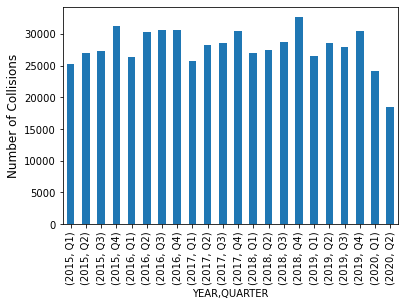

In [15]:
by_quar.plot.bar()
plt.ylabel('Number of Collisions',fontsize=12);

Hypothesis One: 

There were less crashes in the second quarter of 2020 than the second quarter of other years because of Covid-19 and more people staying at home. 

In [16]:
quartr2=[] 
for i in range(len(df)):
    if df_crash.QUARTER[i]=='Q2':
        quartr2.append(True)
    else:
        quartr2.append(False)
#creating list that says 'True' if the df_crash.QUARTER[i] value is Q2 and 'False' if the value is not 'Q2'

In [17]:
quarter2=pandas.Series(quartr2) #turning list into series to pass through the df_crash dataframe
dfq2=df_crash[quarter2] #passing series through df_crash dataframe

In [18]:
dq2=dfq2.groupby(['YEAR', 'QUARTER']) 
#grouping dataframe by 'YEAR' and 'QUARTER' columns

In [19]:
dq2=dq2['COUNT'].sum() 
#finding the sum of the count column to see the number of collisions from the second quarter of each year

In [20]:
dq2

YEAR  QUARTER
2015  Q2         26963
2016  Q2         30250
2017  Q2         28343
2018  Q2         27543
2019  Q2         28518
2020  Q2         18461
Name: COUNT, dtype: int64

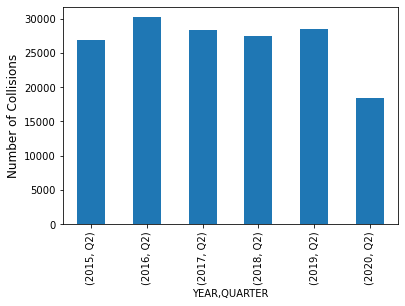

In [21]:
dq2.plot.bar()
plt.ylabel('Number of Collisions',fontsize=12); 

I found that my hypothesis of there being less collisions during the second quarter of 2020 was correct. This could be due to the Covid-19 restrictions and more people staying at home.

Hypothesis Two:


More crashes happened during rush hour than other hours, due to the amount of traffic and people on the road at those times. 

In [22]:
#converting the strings of the start and end times of rush hour in Maryland to datetime.time
rhmorn1=datetime.strptime('05:59:59', '%H:%M:%S').time()
rhmorn2=datetime.strptime('09:29:59', '%H:%M:%S').time()
rhaftn1=datetime.strptime('15:29:59', '%H:%M:%S').time()
rhaftn2=datetime.strptime('18:29:59', '%H:%M:%S').time()
#Reference: https://stackoverflow.com/questions/14295673/convert-string-into-datetime-time-object

In [23]:
rushhour=[] #loop that appends 'RushHour' if time value in df_crash['ACC_TIME'] is within rush hour times and 'NotRushHour' if the time value is not within rush hour times
for t in df_crash['ACC_TIME']:
    if rhmorn1<t<rhmorn2 or rhaftn1<t<rhaftn2:
        rushhour.append("RushHour")
    else:
        rushhour.append('NotRushHour')

In [24]:
df_crash.insert(2, "RUSH_HOUR", rushhour, False) 
#inserting the rushhour list as column in df_crash dataframe 

In [25]:
dfrh=df_crash.groupby(['YEAR', 'QUARTER', 'RUSH_HOUR'])
#grouping dataframe by the 'YEAR', 'QUARTER', and 'RUSH_HOUR' columns

In [26]:
dfrush_hr=dfrh['COUNT'].sum()
#finding the number of crashes that happened during rush hour and happened outside of rush hour during each year and quarter

In [27]:
dfrush_hr

YEAR  QUARTER  RUSH_HOUR  
2015  Q1       NotRushHour    16162
               RushHour        9045
      Q2       NotRushHour    17511
               RushHour        9452
      Q3       NotRushHour    17705
               RushHour        9581
      Q4       NotRushHour    19704
               RushHour       11573
2016  Q1       NotRushHour    16794
               RushHour        9533
      Q2       NotRushHour    19293
               RushHour       10957
      Q3       NotRushHour    19761
               RushHour       10925
      Q4       NotRushHour    19264
               RushHour       11450
2017  Q1       NotRushHour    16178
               RushHour        9597
      Q2       NotRushHour    18105
               RushHour       10238
      Q3       NotRushHour    18337
               RushHour       10227
      Q4       NotRushHour    19098
               RushHour       11412
2018  Q1       NotRushHour    16970
               RushHour       10003
      Q2       NotRushHour    17328
 

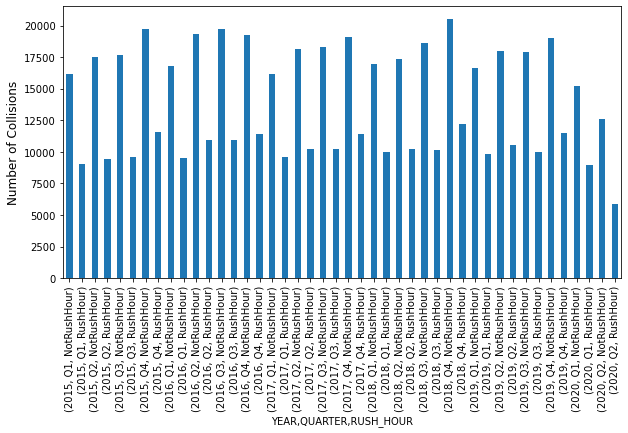

In [32]:
dfrush_hr.plot.bar() 
plt.ylabel('Number of Collisions',fontsize=12)
plt.rcParams['figure.figsize']=(10,5);

In [29]:
per_df=(dfrush_hr/by_quar)*100 
#finding the percentages of collisions that happened during rush hour and outside of rush hour using the sums of collisions that I found when I grouped the data by the year and quarter 

In [35]:
dfrush_hr

YEAR  QUARTER  RUSH_HOUR  
2015  Q1       NotRushHour    16162
               RushHour        9045
      Q2       NotRushHour    17511
               RushHour        9452
      Q3       NotRushHour    17705
               RushHour        9581
      Q4       NotRushHour    19704
               RushHour       11573
2016  Q1       NotRushHour    16794
               RushHour        9533
      Q2       NotRushHour    19293
               RushHour       10957
      Q3       NotRushHour    19761
               RushHour       10925
      Q4       NotRushHour    19264
               RushHour       11450
2017  Q1       NotRushHour    16178
               RushHour        9597
      Q2       NotRushHour    18105
               RushHour       10238
      Q3       NotRushHour    18337
               RushHour       10227
      Q4       NotRushHour    19098
               RushHour       11412
2018  Q1       NotRushHour    16970
               RushHour       10003
      Q2       NotRushHour    17328
 

In [30]:
per_df

YEAR  QUARTER  RUSH_HOUR  
2015  Q1       NotRushHour    64.117110
               RushHour       35.882890
      Q2       NotRushHour    64.944554
               RushHour       35.055446
      Q3       NotRushHour    64.886755
               RushHour       35.113245
      Q4       NotRushHour    62.998369
               RushHour       37.001631
2016  Q1       NotRushHour    63.790025
               RushHour       36.209975
      Q2       NotRushHour    63.778512
               RushHour       36.221488
      Q3       NotRushHour    64.397445
               RushHour       35.602555
      Q4       NotRushHour    62.720583
               RushHour       37.279417
2017  Q1       NotRushHour    62.766246
               RushHour       37.233754
      Q2       NotRushHour    63.878206
               RushHour       36.121794
      Q3       NotRushHour    64.196191
               RushHour       35.803809
      Q4       NotRushHour    62.595870
               RushHour       37.404130
2018  Q1     

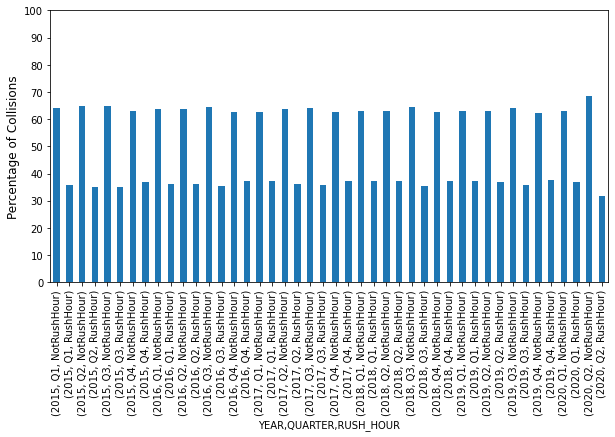

In [31]:
per_df.plot.bar()
plt.ylabel('Percentage of Collisions',fontsize=12)
plt.ylim(0,100)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.rcParams['figure.figsize']=(10,5);
#Reference: https://www.youtube.com/watch?v=dkWtr8AJOCM&ab_channel=DataScienceforAll

I found that my hypothesis was incorrect and that across all of the years and quarters, there were less collisions that happened during rush hour than collisions that happended outside of rush hour. 

For all of the years and quarters the collisions that took place during rush hour made up about 35-37% of collisions that happened during that quarter. However during quarter 2 of 2020, the percentage of collisions that took place during rush hour dropped to 31.629%. This could be due to the fact that with Covid-19 restrictions, a lot of people were working from home so there were not as many people on the road during rush hour.